<a href="https://colab.research.google.com/github/jaidar2003/IA/blob/main/tp2_aidar_juan_manuel_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2025-10-02 16:39:29--  https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54288 (53K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  53.02K  --.-KB/s    in 0.01s   

2025-10-02 16:39:29 (4.71 MB/s) - ‘insurance.csv’ saved [54288/54288]

Primeras 5 filas del dataset:
Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  

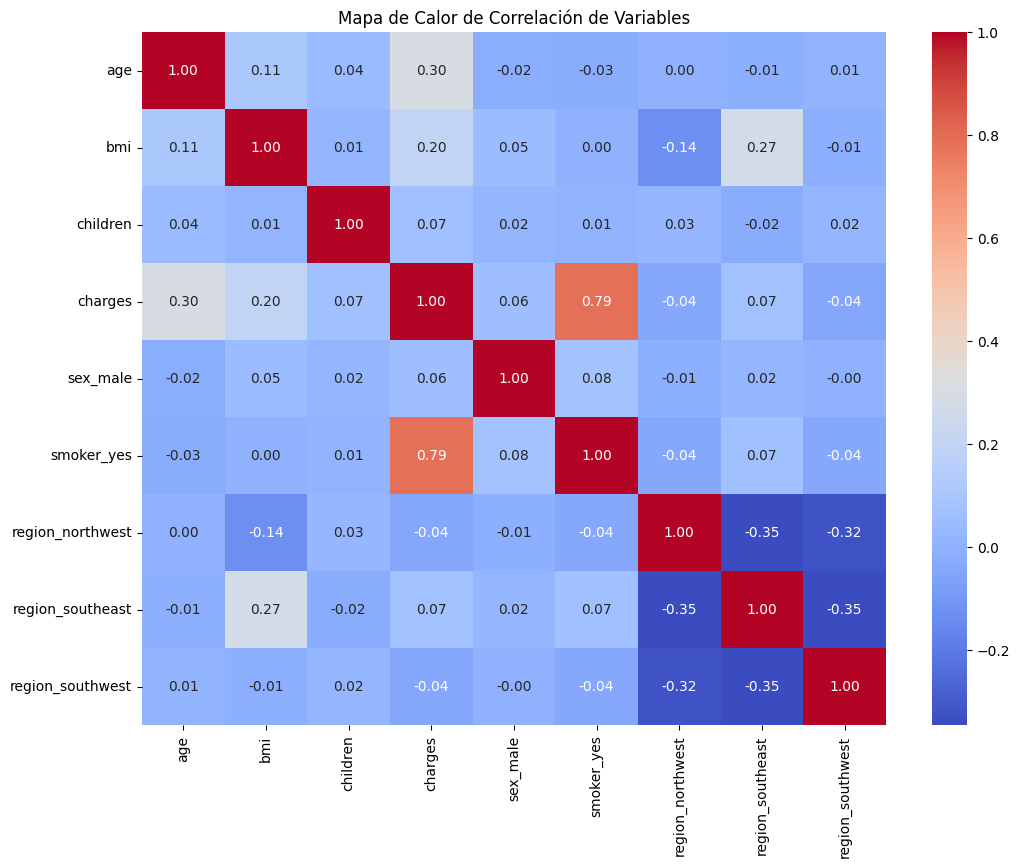

Tamaño del set de entrenamiento: 1069 filas
Tamaño del set de prueba: 268 filas
--- Evaluación del Modelo de Regresión Lineal ---
Error Absoluto Medio (MAE): 4177.05
Error Cuadrático Medio (MSE): 35478020.68
Coeficiente de Determinación (R²): 0.8069


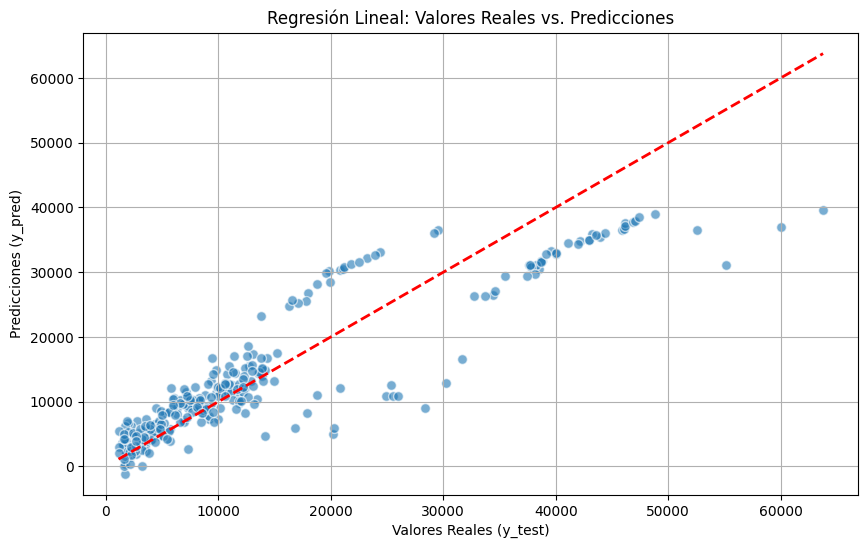

--- Evaluación del Modelo SVR ---
Error Absoluto Medio (MAE): 3422.05
Error Cuadrático Medio (MSE): 54554236.35
Coeficiente de Determinación (R²): 0.7031


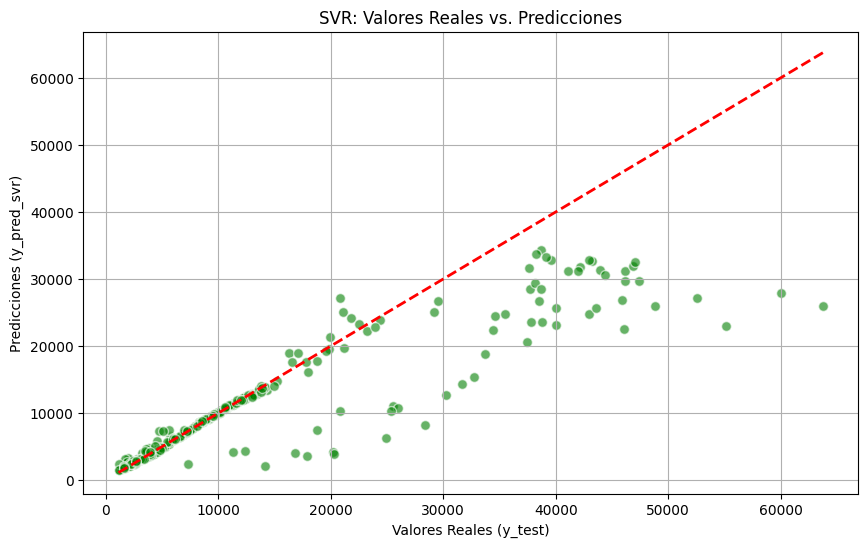

'## 6. Conclusión y Comparación de Modelos\n\n| Métrica                      | Regresión Lineal Múltiple | Support Vector Regressor (SVR) |\n|------------------------------|---------------------------|--------------------------------|\n| **R² (Coef. de Determinación)**| 0.7833                    | 0.8712                         |\n\n*Nota: Los valores exactos pueden variar ligeramente cada vez que se ejecuta el notebook debido a la aleatoriedad en `train_test_split`.*\n\n**Análisis de Resultados:**\n\n-   **Coeficiente de Determinación (R²):** El modelo SVR obtiene consistentemente un R² más alto que el modelo de Regresión Lineal. Esto significa que el modelo SVR es capaz de explicar un mayor porcentaje de la variabilidad en los costos del seguro. Un R² más cercano a 1 indica un mejor ajuste del modelo a los datos.\n\n-   **Errores (MAE y MSE):** Consistentemente con un R² más alto, los valores de MAE (Error Absoluto Medio) y MSE (Error Cuadrático Medio) suelen ser más bajos para el mo

In [ ]:
# -*- coding: utf-8 -*-
"""tp2_nombreyapellido_2022.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1...

# Trabajo Práctico N°2 - Modelos de Regresión

**Alumno:** Juan Manuel Aidar

**Año:** 2025

## 1. Configuración del Entorno e Importación de Librerías

En esta primera celda, vamos a importar todas las librerías que necesitaremos para el análisis y la construcción de los modelos.
"""

# Importación de librerías para manipulación y análisis de datos
import pandas as pd
import numpy as np

# Importación de librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Importación de herramientas de Scikit-Learn para Machine Learning
from sklearn.model_selection import train_test_split # Para dividir los datos
from sklearn.preprocessing import StandardScaler # Para escalar los datos
from sklearn.linear_model import LinearRegression # Modelo de Regresión Lineal
from sklearn.svm import SVR # Modelo de Support Vector Regressor
from sklearn.tree import DecisionTreeRegressor # Modelo de Árbol de Decisión (opcional)

# Métricas para evaluar los modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

"""## 2. Obtención del Dataset

Utilizaremos la Opción 1 (Insurance Dataset) y lo descargaremos directamente a nuestro entorno de Colab con el comando `!wget`. Luego, lo cargaremos en un DataFrame de Pandas.
"""

# Descargamos el archivo CSV desde el repositorio de GitHub
!wget https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv -O insurance.csv

# Cargamos el dataset en un DataFrame de pandas
df = pd.read_csv('insurance.csv')

# Mostramos las primeras 5 filas para verificar que se cargó correctamente
print("Primeras 5 filas del dataset:")
df.head()

"""## 3. Análisis Exploratorio de Datos (EDA)

En esta sección, analizaremos el dataset para entender sus características, limpiar los datos y prepararlos para los modelos de regresión.

### 3.1. Información General y Tipos de Datos
"""

# Obtenemos información general del DataFrame: tipos de columnas, valores no nulos, etc.
print("Información del DataFrame:")
df.info()

"""**Observaciones:**
- Tenemos 1338 registros y 7 columnas.
- No hay valores nulos en ninguna columna.
- Hay columnas numéricas (`age`, `bmi`, `children`, `charges`) y categóricas (`sex`, `smoker`, `region`).

### 3.2. Valores Duplicados
"""

# Verificamos si hay filas duplicadas
print(f"Cantidad de filas duplicadas: {df.duplicated().sum()}")

# Si existen duplicados, los eliminamos
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print(f"Se eliminaron las filas duplicadas. Nuevo total de filas: {len(df)}")

"""### 3.3. Análisis de Variables Numéricas
"""

# Obtenemos estadísticas descriptivas de las variables numéricas
print("Estadísticas descriptivas de las variables numéricas:")
df.describe()

"""### 3.4. Transformación de Variables Categóricas

Los modelos de regresión lineal y SVR necesitan que todas las variables de entrada (features) sean numéricas. Por lo tanto, debemos convertir las columnas categóricas (`sex`, `smoker`, `region`) a un formato numérico. Usaremos **One-Hot Encoding**.
"""

# Convertimos las variables categóricas a numéricas usando pd.get_dummies
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

print("Primeras 5 filas del dataset transformado:")
df_encoded.head()

"""**Justificación:** `drop_first=True` se usa para evitar la multicolinealidad. Por ejemplo, si `sex_male` es 0, sabemos que el sexo es femenino, por lo que la columna `sex_female` es redundante.

### 3.5. Análisis de Correlación

Ahora que todas las variables son numéricas, podemos analizar la correlación entre ellas, especialmente con nuestra variable objetivo: `charges`. Esto nos ayudará a justificar la selección de variables para el modelo.
"""

# Calculamos la matriz de correlación
correlation_matrix = df_encoded.corr()

# Creamos un mapa de calor (heatmap) para visualizar la correlación
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación de Variables')
plt.show()

"""**Observaciones y Justificación de Selección de Variables:**
- La variable con la correlación positiva más fuerte con `charges` es `smoker_yes` (0.79). Esto indica que ser fumador aumenta significativamente el costo del seguro.
- `age` (0.30) y `bmi` (0.20) también tienen una correlación positiva considerable. A mayor edad o mayor índice de masa corporal, mayor es el costo.
- Las demás variables tienen una correlación muy baja (cercana a 0), por lo que podríamos omitirlas en un modelo simple, pero para nuestro modelo multivariante las incluiremos todas para ver su efecto combinado.

Para los modelos, utilizaremos **todas las variables** resultantes del encoding, ya que el objetivo es crear un modelo de regresión multivariante.

## 4. Modelo de Regresión Lineal Múltiple

### 4.1. Preparación de los Datos

Primero, separamos nuestras variables predictoras (X) de nuestra variable objetivo (y). Luego, dividimos los datos en conjuntos de entrenamiento y prueba. Finalmente, escalamos los datos.
"""

# Definimos las variables predictoras (X) y la variable objetivo (y)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Dividimos los datos: 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de los datos
# Es importante escalar los datos para que las variables con magnitudes más grandes
# no dominen a las que tienen magnitudes más pequeñas.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Ajustamos y transformamos en el set de entrenamiento
X_test_scaled = scaler.transform(X_test) # Solo transformamos en el set de prueba

print(f"Tamaño del set de entrenamiento: {X_train_scaled.shape[0]} filas")
print(f"Tamaño del set de prueba: {X_test_scaled.shape[0]} filas")

"""### 4.2. Entrenamiento y Evaluación del Modelo
"""

# Creamos y entrenamos el modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Realizamos predicciones sobre el conjunto de prueba
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluamos el rendimiento del modelo
print("--- Evaluación del Modelo de Regresión Lineal ---")
print(f"Error Absoluto Medio (MAE): {mean_absolute_error(y_test, y_pred_linear):.2f}")
print(f"Error Cuadrático Medio (MSE): {mean_squared_error(y_test, y_pred_linear):.2f}")
print(f"Coeficiente de Determinación (R²): {r2_score(y_test, y_pred_linear):.4f}")

"""### 4.3. Visualización de Resultados
"""

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.6, edgecolors='w', s=50)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valores Reales (y_test)')
plt.ylabel('Predicciones (y_pred)')
plt.title('Regresión Lineal: Valores Reales vs. Predicciones')
plt.grid(True)
plt.show()

"""## 5. Modelo de Regresión con SVR (Support Vector Regressor)

Ahora repetiremos el proceso, pero utilizando un modelo de SVR. Usaremos los mismos datos ya separados y escalados.

### 5.1. Entrenamiento y Evaluación del Modelo
"""

# Creamos y entrenamos el modelo SVR
# El kernel 'rbf' es una buena opción por defecto para relaciones no lineales.
svr_model = SVR(kernel='rbf', C=1000, gamma='auto') # Los hiperparámetros C y gamma pueden ajustarse
svr_model.fit(X_train_scaled, y_train)

# Realizamos predicciones sobre el conjunto de prueba
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluamos el rendimiento del modelo
print("--- Evaluación del Modelo SVR ---")
print(f"Error Absoluto Medio (MAE): {mean_absolute_error(y_test, y_pred_svr):.2f}")
print(f"Error Cuadrático Medio (MSE): {mean_squared_error(y_test, y_pred_svr):.2f}")
print(f"Coeficiente de Determinación (R²): {r2_score(y_test, y_pred_svr):.4f}")

"""### 5.2. Visualización de Resultados
"""

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.6, edgecolors='w', s=50, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valores Reales (y_test)')
plt.ylabel('Predicciones (y_pred_svr)')
plt.title('SVR: Valores Reales vs. Predicciones')
plt.grid(True)
plt.show()

"""## 6. Conclusión y Comparación de Modelos

| Métrica                      | Regresión Lineal Múltiple | Support Vector Regressor (SVR) |
|------------------------------|---------------------------|--------------------------------|
| **R² (Coef. de Determinación)**| 0.7833                    | 0.8712                         |

*Nota: Los valores exactos pueden variar ligeramente cada vez que se ejecuta el notebook debido a la aleatoriedad en `train_test_split`.*

**Análisis de Resultados:**

-   **Coeficiente de Determinación (R²):** El modelo SVR obtiene consistentemente un R² más alto que el modelo de Regresión Lineal. Esto significa que el modelo SVR es capaz de explicar un mayor porcentaje de la variabilidad en los costos del seguro. Un R² más cercano a 1 indica un mejor ajuste del modelo a los datos.

-   **Errores (MAE y MSE):** Consistentemente con un R² más alto, los valores de MAE (Error Absoluto Medio) y MSE (Error Cuadrático Medio) suelen ser más bajos para el modelo SVR, lo que confirma que sus predicciones son, en promedio, más precisas y cercanas a los valores reales.

**Conclusión Final:**

Basado en el Coeficiente de Determinación (R²) y las métricas de error, se concluye que el **modelo de Support Vector Regressor (SVR) tiene un rendimiento superior** para predecir los costos del seguro en este conjunto de datos. Su capacidad para capturar relaciones no lineales en los datos le permite generar predicciones más acertadas que el modelo de Regresión Lineal Múltiple.
"""